# Color Conversion

This example visualizes the spectra and color patches of particular colors. In particular, spectra are converted to XYZ, xyY, sRGB, and L\*a\*b\*.

Firstly, we import required packages.

In [1]:
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt

import jaxlayerlumos.colors.transform as jll_colors_transform
import jaxlayerlumos.colors.composite as jll_colors_composite

Then, we define a function to depict efficiency over wavelengths and color patch.

In [2]:
def plot_spectrum_color(color, wavelengths, spectrum, sRGB):
    grid_size = 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), width_ratios=[2, 1])

    ax1.plot(wavelengths, spectrum)

    ax1.set_xlabel("Wavelength (nm)")
    ax1.set_ylabel("Efficiency")
    ax1.grid()

    ax2.fill(
        (50, -50, -50, 50),
        (50, 50, -50, -50),
        color=onp.clip(sRGB, 0, 1),
    )

    ax2.set_xlim([-50, 50])
    ax2.set_ylim([-50, 50])

    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

    ax2.set_aspect('equal')

    fig.suptitle(f"Spectrum and Color Patch of {color}")

    plt.tight_layout()
    plt.show()

The spectra of specific colors are defined. Here, `Red`, `Green`, `Blue`, `Pitt Gold`, and `Pitt Royal Blue` are specified. The first row is wavelengths in nanometers and the second row is efficiency over wavelengths.

In [3]:
red = jnp.array([
    [380.0, 380.4, 380.8, 381.2, 381.6, 382.0, 382.4, 382.8, 383.2, 383.6, 384.0, 384.4, 384.8, 385.2, 385.6, 386.0, 386.4, 386.8, 387.2, 387.6, 388.0, 388.4, 388.8, 389.2, 389.6, 390.0, 390.4, 390.8, 391.2, 391.6, 392.0, 392.4, 392.8, 393.2, 393.6, 394.0, 394.4, 394.8, 395.2, 395.6, 396.0, 396.4, 396.8, 397.2, 397.6, 398.0, 398.4, 398.8, 399.2, 399.6, 400.0, 400.4, 400.8, 401.2, 401.6, 402.0, 402.4, 402.8, 403.2, 403.6, 404.0, 404.4, 404.8, 405.2, 405.6, 406.0, 406.4, 406.8, 407.2, 407.6, 408.0, 408.4, 408.8, 409.2, 409.6, 410.0, 410.4, 410.8, 411.2, 411.6, 412.0, 412.4, 412.8, 413.2, 413.6, 414.0, 414.4, 414.8, 415.2, 415.6, 416.0, 416.4, 416.8, 417.2, 417.6, 418.0, 418.4, 418.8, 419.2, 419.6, 420.0, 420.4, 420.8, 421.2, 421.6, 422.0, 422.4, 422.8, 423.2, 423.6, 424.0, 424.4, 424.8, 425.2, 425.6, 426.0, 426.4, 426.8, 427.2, 427.6, 428.0, 428.4, 428.8, 429.2, 429.6, 430.0, 430.4, 430.8, 431.2, 431.6, 432.0, 432.4, 432.8, 433.2, 433.6, 434.0, 434.4, 434.8, 435.2, 435.6, 436.0, 436.4, 436.8, 437.2, 437.6, 438.0, 438.4, 438.8, 439.2, 439.6, 440.0, 440.4, 440.8, 441.2, 441.6, 442.0, 442.4, 442.8, 443.2, 443.6, 444.0, 444.4, 444.8, 445.2, 445.6, 446.0, 446.4, 446.8, 447.2, 447.6, 448.0, 448.4, 448.8, 449.2, 449.6, 450.0, 450.4, 450.8, 451.2, 451.6, 452.0, 452.4, 452.8, 453.2, 453.6, 454.0, 454.4, 454.8, 455.2, 455.6, 456.0, 456.4, 456.8, 457.2, 457.6, 458.0, 458.4, 458.8, 459.2, 459.6, 460.0, 460.4, 460.8, 461.2, 461.6, 462.0, 462.4, 462.8, 463.2, 463.6, 464.0, 464.4, 464.8, 465.2, 465.6, 466.0, 466.4, 466.8, 467.2, 467.6, 468.0, 468.4, 468.8, 469.2, 469.6, 470.0, 470.4, 470.8, 471.2, 471.6, 472.0, 472.4, 472.8, 473.2, 473.6, 474.0, 474.4, 474.8, 475.2, 475.6, 476.0, 476.4, 476.8, 477.2, 477.6, 478.0, 478.4, 478.8, 479.2, 479.6, 480.0, 480.4, 480.8, 481.2, 481.6, 482.0, 482.4, 482.8, 483.2, 483.6, 484.0, 484.4, 484.8, 485.2, 485.6, 486.0, 486.4, 486.8, 487.2, 487.6, 488.0, 488.4, 488.8, 489.2, 489.6, 490.0, 490.4, 490.8, 491.2, 491.6, 492.0, 492.4, 492.8, 493.2, 493.6, 494.0, 494.4, 494.8, 495.2, 495.6, 496.0, 496.4, 496.8, 497.2, 497.6, 498.0, 498.4, 498.8, 499.2, 499.6, 500.0, 500.4, 500.8, 501.2, 501.6, 502.0, 502.4, 502.8, 503.2, 503.6, 504.0, 504.4, 504.8, 505.2, 505.6, 506.0, 506.4, 506.8, 507.2, 507.6, 508.0, 508.4, 508.8, 509.2, 509.6, 510.0, 510.4, 510.8, 511.2, 511.6, 512.0, 512.4, 512.8, 513.2, 513.6, 514.0, 514.4, 514.8, 515.2, 515.6, 516.0, 516.4, 516.8, 517.2, 517.6, 518.0, 518.4, 518.8, 519.2, 519.6, 520.0, 520.4, 520.8, 521.2, 521.6, 522.0, 522.4, 522.8, 523.2, 523.6, 524.0, 524.4, 524.8, 525.2, 525.6, 526.0, 526.4, 526.8, 527.2, 527.6, 528.0, 528.4, 528.8, 529.2, 529.6, 530.0, 530.4, 530.8, 531.2, 531.6, 532.0, 532.4, 532.8, 533.2, 533.6, 534.0, 534.4, 534.8, 535.2, 535.6, 536.0, 536.4, 536.8, 537.2, 537.6, 538.0, 538.4, 538.8, 539.2, 539.6, 540.0, 540.4, 540.8, 541.2, 541.6, 542.0, 542.4, 542.8, 543.2, 543.6, 544.0, 544.4, 544.8, 545.2, 545.6, 546.0, 546.4, 546.8, 547.2, 547.6, 548.0, 548.4, 548.8, 549.2, 549.6, 550.0, 550.4, 550.8, 551.2, 551.6, 552.0, 552.4, 552.8, 553.2, 553.6, 554.0, 554.4, 554.8, 555.2, 555.6, 556.0, 556.4, 556.8, 557.2, 557.6, 558.0, 558.4, 558.8, 559.2, 559.6, 560.0, 560.4, 560.8, 561.2, 561.6, 562.0, 562.4, 562.8, 563.2, 563.6, 564.0, 564.4, 564.8, 565.2, 565.6, 566.0, 566.4, 566.8, 567.2, 567.6, 568.0, 568.4, 568.8, 569.2, 569.6, 570.0, 570.4, 570.8, 571.2, 571.6, 572.0, 572.4, 572.8, 573.2, 573.6, 574.0, 574.4, 574.8, 575.2, 575.6, 576.0, 576.4, 576.8, 577.2, 577.6, 578.0, 578.4, 578.8, 579.2, 579.6, 580.0, 580.4, 580.8, 581.2, 581.6, 582.0, 582.4, 582.8, 583.2, 583.6, 584.0, 584.4, 584.8, 585.2, 585.6, 586.0, 586.4, 586.8, 587.2, 587.6, 588.0, 588.4, 588.8, 589.2, 589.6, 590.0, 590.4, 590.8, 591.2, 591.6, 592.0, 592.4, 592.8, 593.2, 593.6, 594.0, 594.4, 594.8, 595.2, 595.6, 596.0, 596.4, 596.8, 597.2, 597.6, 598.0, 598.4, 598.8, 599.2, 599.6, 600.0, 600.4, 600.8, 601.2, 601.6, 602.0, 602.4, 602.8, 603.2, 603.6, 604.0, 604.4, 604.8, 605.2, 605.6, 606.0, 606.4, 606.8, 607.2, 607.6, 608.0, 608.4, 608.8, 609.2, 609.6, 610.0, 610.4, 610.8, 611.2, 611.6, 612.0, 612.4, 612.8, 613.2, 613.6, 614.0, 614.4, 614.8, 615.2, 615.6, 616.0, 616.4, 616.8, 617.2, 617.6, 618.0, 618.4, 618.8, 619.2, 619.6, 620.0, 620.4, 620.8, 621.2, 621.6, 622.0, 622.4, 622.8, 623.2, 623.6, 624.0, 624.4, 624.8, 625.2, 625.6, 626.0, 626.4, 626.8, 627.2, 627.6, 628.0, 628.4, 628.8, 629.2, 629.6, 630.0, 630.4, 630.8, 631.2, 631.6, 632.0, 632.4, 632.8, 633.2, 633.6, 634.0, 634.4, 634.8, 635.2, 635.6, 636.0, 636.4, 636.8, 637.2, 637.6, 638.0, 638.4, 638.8, 639.2, 639.6, 640.0, 640.4, 640.8, 641.2, 641.6, 642.0, 642.4, 642.8, 643.2, 643.6, 644.0, 644.4, 644.8, 645.2, 645.6, 646.0, 646.4, 646.8, 647.2, 647.6, 648.0, 648.4, 648.8, 649.2, 649.6, 650.0, 650.4, 650.8, 651.2, 651.6, 652.0, 652.4, 652.8, 653.2, 653.6, 654.0, 654.4, 654.8, 655.2, 655.6, 656.0, 656.4, 656.8, 657.2, 657.6, 658.0, 658.4, 658.8, 659.2, 659.6, 660.0, 660.4, 660.8, 661.2, 661.6, 662.0, 662.4, 662.8, 663.2, 663.6, 664.0, 664.4, 664.8, 665.2, 665.6, 666.0, 666.4, 666.8, 667.2, 667.6, 668.0, 668.4, 668.8, 669.2, 669.6, 670.0, 670.4, 670.8, 671.2, 671.6, 672.0, 672.4, 672.8, 673.2, 673.6, 674.0, 674.4, 674.8, 675.2, 675.6, 676.0, 676.4, 676.8, 677.2, 677.6, 678.0, 678.4, 678.8, 679.2, 679.6, 680.0, 680.4, 680.8, 681.2, 681.6, 682.0, 682.4, 682.8, 683.2, 683.6, 684.0, 684.4, 684.8, 685.2, 685.6, 686.0, 686.4, 686.8, 687.2, 687.6, 688.0, 688.4, 688.8, 689.2, 689.6, 690.0, 690.4, 690.8, 691.2, 691.6, 692.0, 692.4, 692.8, 693.2, 693.6, 694.0, 694.4, 694.8, 695.2, 695.6, 696.0, 696.4, 696.8, 697.2, 697.6, 698.0, 698.4, 698.8, 699.2, 699.6, 700.0, 700.4, 700.8, 701.2, 701.6, 702.0, 702.4, 702.8, 703.2, 703.6, 704.0, 704.4, 704.8, 705.2, 705.6, 706.0, 706.4, 706.8, 707.2, 707.6, 708.0, 708.4, 708.8, 709.2, 709.6, 710.0, 710.4, 710.8, 711.2, 711.6, 712.0, 712.4, 712.8, 713.2, 713.6, 714.0, 714.4, 714.8, 715.2, 715.6, 716.0, 716.4, 716.8, 717.2, 717.6, 718.0, 718.4, 718.8, 719.2, 719.6, 720.0, 720.4, 720.8, 721.2, 721.6, 722.0, 722.4, 722.8, 723.2, 723.6, 724.0, 724.4, 724.8, 725.2, 725.6, 726.0, 726.4, 726.8, 727.2, 727.6, 728.0, 728.4, 728.8, 729.2, 729.6, 730.0, 730.4, 730.8, 731.2, 731.6, 732.0, 732.4, 732.8, 733.2, 733.6, 734.0, 734.4, 734.8, 735.2, 735.6, 736.0, 736.4, 736.8, 737.2, 737.6, 738.0, 738.4, 738.8, 739.2, 739.6, 740.0, 740.4, 740.8, 741.2, 741.6, 742.0, 742.4, 742.8, 743.2, 743.6, 744.0, 744.4, 744.8, 745.2, 745.6, 746.0, 746.4, 746.8, 747.2, 747.6, 748.0, 748.4, 748.8, 749.2, 749.6, 750.0, 750.4, 750.8, 751.2, 751.6, 752.0, 752.4, 752.8, 753.2, 753.6, 754.0, 754.4, 754.8, 755.2, 755.6, 756.0, 756.4, 756.8, 757.2, 757.6, 758.0, 758.4, 758.8, 759.2, 759.6, 760.0, 760.4, 760.8, 761.2, 761.6, 762.0, 762.4, 762.8, 763.2, 763.6, 764.0, 764.4, 764.8, 765.2, 765.6, 766.0, 766.4, 766.8, 767.2, 767.6, 768.0, 768.4, 768.8, 769.2, 769.6, 770.0, 770.4, 770.8, 771.2, 771.6, 772.0, 772.4, 772.8, 773.2, 773.6, 774.0, 774.4, 774.8, 775.2, 775.6, 776.0, 776.4, 776.8, 777.2, 777.6, 778.0, 778.4, 778.8, 779.2, 779.6, 780.0],
    [0.970, 0.969, 0.967, 0.966, 0.964, 0.963, 0.961, 0.959, 0.957, 0.955, 0.953, 0.951, 0.948, 0.946, 0.943, 0.940, 0.937, 0.933, 0.930, 0.926, 0.921, 0.917, 0.912, 0.907, 0.901, 0.895, 0.888, 0.881, 0.873, 0.864, 0.855, 0.845, 0.834, 0.823, 0.810, 0.797, 0.782, 0.767, 0.750, 0.733, 0.714, 0.694, 0.673, 0.651, 0.628, 0.604, 0.579, 0.554, 0.529, 0.504, 0.479, 0.454, 0.429, 0.405, 0.382, 0.360, 0.338, 0.318, 0.299, 0.280, 0.263, 0.247, 0.232, 0.218, 0.205, 0.193, 0.182, 0.172, 0.162, 0.153, 0.145, 0.137, 0.130, 0.123, 0.117, 0.111, 0.105, 0.100, 0.096, 0.091, 0.087, 0.083, 0.080, 0.076, 0.073, 0.070, 0.068, 0.065, 0.062, 0.060, 0.058, 0.056, 0.054, 0.052, 0.050, 0.049, 0.047, 0.045, 0.044, 0.043, 0.041, 0.040, 0.039, 0.038, 0.037, 0.036, 0.035, 0.034, 0.033, 0.032, 0.031, 0.030, 0.030, 0.029, 0.028, 0.028, 0.027, 0.026, 0.026, 0.025, 0.025, 0.024, 0.024, 0.023, 0.023, 0.022, 0.022, 0.021, 0.021, 0.021, 0.020, 0.020, 0.020, 0.019, 0.019, 0.019, 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.016, 0.016, 0.016, 0.016, 0.016, 0.015, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.015, 0.015, 0.015, 0.015, 0.016, 0.016, 0.016, 0.016, 0.017, 0.017, 0.017, 0.017, 0.018, 0.018, 0.018, 0.019, 0.019, 0.019, 0.020, 0.020, 0.020, 0.021, 0.021, 0.021, 0.022, 0.022, 0.023, 0.023, 0.024, 0.024, 0.025, 0.025, 0.026, 0.026, 0.027, 0.028, 0.028, 0.029, 0.030, 0.031, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.040, 0.041, 0.043, 0.044, 0.046, 0.047, 0.049, 0.050, 0.052, 0.054, 0.056, 0.058, 0.060, 0.063, 0.065, 0.068, 0.070, 0.073, 0.077, 0.080, 0.084, 0.087, 0.092, 0.096, 0.101, 0.106, 0.111, 0.117, 0.123, 0.130, 0.137, 0.145, 0.154, 0.163, 0.172, 0.183, 0.194, 0.206, 0.219, 0.233, 0.248, 0.264, 0.282, 0.300, 0.319, 0.340, 0.361, 0.383, 0.407, 0.431, 0.455, 0.480, 0.505, 0.531, 0.556, 0.581, 0.605, 0.629, 0.652, 0.674, 0.695, 0.715, 0.734, 0.751, 0.768, 0.783, 0.798, 0.811, 0.824, 0.835, 0.846, 0.856, 0.865, 0.873, 0.881, 0.888, 0.895, 0.901, 0.907, 0.912, 0.917, 0.922, 0.926, 0.930, 0.934, 0.937, 0.940, 0.943, 0.946, 0.949, 0.951, 0.953, 0.955, 0.957, 0.959, 0.961, 0.963, 0.964, 0.966, 0.967, 0.969, 0.970, 0.971, 0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.979, 0.980, 0.981, 0.981, 0.982, 0.983, 0.983, 0.984, 0.984, 0.985, 0.985, 0.986, 0.986, 0.986, 0.987, 0.987, 0.988, 0.988, 0.988, 0.989, 0.989, 0.989, 0.990, 0.990, 0.990, 0.990, 0.991, 0.991, 0.991, 0.991, 0.992, 0.992, 0.992, 0.992, 0.992, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000],
])

green = jnp.array([
    [380.0, 380.4, 380.8, 381.2, 381.6, 382.0, 382.4, 382.8, 383.2, 383.6, 384.0, 384.4, 384.8, 385.2, 385.6, 386.0, 386.4, 386.8, 387.2, 387.6, 388.0, 388.4, 388.8, 389.2, 389.6, 390.0, 390.4, 390.8, 391.2, 391.6, 392.0, 392.4, 392.8, 393.2, 393.6, 394.0, 394.4, 394.8, 395.2, 395.6, 396.0, 396.4, 396.8, 397.2, 397.6, 398.0, 398.4, 398.8, 399.2, 399.6, 400.0, 400.4, 400.8, 401.2, 401.6, 402.0, 402.4, 402.8, 403.2, 403.6, 404.0, 404.4, 404.8, 405.2, 405.6, 406.0, 406.4, 406.8, 407.2, 407.6, 408.0, 408.4, 408.8, 409.2, 409.6, 410.0, 410.4, 410.8, 411.2, 411.6, 412.0, 412.4, 412.8, 413.2, 413.6, 414.0, 414.4, 414.8, 415.2, 415.6, 416.0, 416.4, 416.8, 417.2, 417.6, 418.0, 418.4, 418.8, 419.2, 419.6, 420.0, 420.4, 420.8, 421.2, 421.6, 422.0, 422.4, 422.8, 423.2, 423.6, 424.0, 424.4, 424.8, 425.2, 425.6, 426.0, 426.4, 426.8, 427.2, 427.6, 428.0, 428.4, 428.8, 429.2, 429.6, 430.0, 430.4, 430.8, 431.2, 431.6, 432.0, 432.4, 432.8, 433.2, 433.6, 434.0, 434.4, 434.8, 435.2, 435.6, 436.0, 436.4, 436.8, 437.2, 437.6, 438.0, 438.4, 438.8, 439.2, 439.6, 440.0, 440.4, 440.8, 441.2, 441.6, 442.0, 442.4, 442.8, 443.2, 443.6, 444.0, 444.4, 444.8, 445.2, 445.6, 446.0, 446.4, 446.8, 447.2, 447.6, 448.0, 448.4, 448.8, 449.2, 449.6, 450.0, 450.4, 450.8, 451.2, 451.6, 452.0, 452.4, 452.8, 453.2, 453.6, 454.0, 454.4, 454.8, 455.2, 455.6, 456.0, 456.4, 456.8, 457.2, 457.6, 458.0, 458.4, 458.8, 459.2, 459.6, 460.0, 460.4, 460.8, 461.2, 461.6, 462.0, 462.4, 462.8, 463.2, 463.6, 464.0, 464.4, 464.8, 465.2, 465.6, 466.0, 466.4, 466.8, 467.2, 467.6, 468.0, 468.4, 468.8, 469.2, 469.6, 470.0, 470.4, 470.8, 471.2, 471.6, 472.0, 472.4, 472.8, 473.2, 473.6, 474.0, 474.4, 474.8, 475.2, 475.6, 476.0, 476.4, 476.8, 477.2, 477.6, 478.0, 478.4, 478.8, 479.2, 479.6, 480.0, 480.4, 480.8, 481.2, 481.6, 482.0, 482.4, 482.8, 483.2, 483.6, 484.0, 484.4, 484.8, 485.2, 485.6, 486.0, 486.4, 486.8, 487.2, 487.6, 488.0, 488.4, 488.8, 489.2, 489.6, 490.0, 490.4, 490.8, 491.2, 491.6, 492.0, 492.4, 492.8, 493.2, 493.6, 494.0, 494.4, 494.8, 495.2, 495.6, 496.0, 496.4, 496.8, 497.2, 497.6, 498.0, 498.4, 498.8, 499.2, 499.6, 500.0, 500.4, 500.8, 501.2, 501.6, 502.0, 502.4, 502.8, 503.2, 503.6, 504.0, 504.4, 504.8, 505.2, 505.6, 506.0, 506.4, 506.8, 507.2, 507.6, 508.0, 508.4, 508.8, 509.2, 509.6, 510.0, 510.4, 510.8, 511.2, 511.6, 512.0, 512.4, 512.8, 513.2, 513.6, 514.0, 514.4, 514.8, 515.2, 515.6, 516.0, 516.4, 516.8, 517.2, 517.6, 518.0, 518.4, 518.8, 519.2, 519.6, 520.0, 520.4, 520.8, 521.2, 521.6, 522.0, 522.4, 522.8, 523.2, 523.6, 524.0, 524.4, 524.8, 525.2, 525.6, 526.0, 526.4, 526.8, 527.2, 527.6, 528.0, 528.4, 528.8, 529.2, 529.6, 530.0, 530.4, 530.8, 531.2, 531.6, 532.0, 532.4, 532.8, 533.2, 533.6, 534.0, 534.4, 534.8, 535.2, 535.6, 536.0, 536.4, 536.8, 537.2, 537.6, 538.0, 538.4, 538.8, 539.2, 539.6, 540.0, 540.4, 540.8, 541.2, 541.6, 542.0, 542.4, 542.8, 543.2, 543.6, 544.0, 544.4, 544.8, 545.2, 545.6, 546.0, 546.4, 546.8, 547.2, 547.6, 548.0, 548.4, 548.8, 549.2, 549.6, 550.0, 550.4, 550.8, 551.2, 551.6, 552.0, 552.4, 552.8, 553.2, 553.6, 554.0, 554.4, 554.8, 555.2, 555.6, 556.0, 556.4, 556.8, 557.2, 557.6, 558.0, 558.4, 558.8, 559.2, 559.6, 560.0, 560.4, 560.8, 561.2, 561.6, 562.0, 562.4, 562.8, 563.2, 563.6, 564.0, 564.4, 564.8, 565.2, 565.6, 566.0, 566.4, 566.8, 567.2, 567.6, 568.0, 568.4, 568.8, 569.2, 569.6, 570.0, 570.4, 570.8, 571.2, 571.6, 572.0, 572.4, 572.8, 573.2, 573.6, 574.0, 574.4, 574.8, 575.2, 575.6, 576.0, 576.4, 576.8, 577.2, 577.6, 578.0, 578.4, 578.8, 579.2, 579.6, 580.0, 580.4, 580.8, 581.2, 581.6, 582.0, 582.4, 582.8, 583.2, 583.6, 584.0, 584.4, 584.8, 585.2, 585.6, 586.0, 586.4, 586.8, 587.2, 587.6, 588.0, 588.4, 588.8, 589.2, 589.6, 590.0, 590.4, 590.8, 591.2, 591.6, 592.0, 592.4, 592.8, 593.2, 593.6, 594.0, 594.4, 594.8, 595.2, 595.6, 596.0, 596.4, 596.8, 597.2, 597.6, 598.0, 598.4, 598.8, 599.2, 599.6, 600.0, 600.4, 600.8, 601.2, 601.6, 602.0, 602.4, 602.8, 603.2, 603.6, 604.0, 604.4, 604.8, 605.2, 605.6, 606.0, 606.4, 606.8, 607.2, 607.6, 608.0, 608.4, 608.8, 609.2, 609.6, 610.0, 610.4, 610.8, 611.2, 611.6, 612.0, 612.4, 612.8, 613.2, 613.6, 614.0, 614.4, 614.8, 615.2, 615.6, 616.0, 616.4, 616.8, 617.2, 617.6, 618.0, 618.4, 618.8, 619.2, 619.6, 620.0, 620.4, 620.8, 621.2, 621.6, 622.0, 622.4, 622.8, 623.2, 623.6, 624.0, 624.4, 624.8, 625.2, 625.6, 626.0, 626.4, 626.8, 627.2, 627.6, 628.0, 628.4, 628.8, 629.2, 629.6, 630.0, 630.4, 630.8, 631.2, 631.6, 632.0, 632.4, 632.8, 633.2, 633.6, 634.0, 634.4, 634.8, 635.2, 635.6, 636.0, 636.4, 636.8, 637.2, 637.6, 638.0, 638.4, 638.8, 639.2, 639.6, 640.0, 640.4, 640.8, 641.2, 641.6, 642.0, 642.4, 642.8, 643.2, 643.6, 644.0, 644.4, 644.8, 645.2, 645.6, 646.0, 646.4, 646.8, 647.2, 647.6, 648.0, 648.4, 648.8, 649.2, 649.6, 650.0, 650.4, 650.8, 651.2, 651.6, 652.0, 652.4, 652.8, 653.2, 653.6, 654.0, 654.4, 654.8, 655.2, 655.6, 656.0, 656.4, 656.8, 657.2, 657.6, 658.0, 658.4, 658.8, 659.2, 659.6, 660.0, 660.4, 660.8, 661.2, 661.6, 662.0, 662.4, 662.8, 663.2, 663.6, 664.0, 664.4, 664.8, 665.2, 665.6, 666.0, 666.4, 666.8, 667.2, 667.6, 668.0, 668.4, 668.8, 669.2, 669.6, 670.0, 670.4, 670.8, 671.2, 671.6, 672.0, 672.4, 672.8, 673.2, 673.6, 674.0, 674.4, 674.8, 675.2, 675.6, 676.0, 676.4, 676.8, 677.2, 677.6, 678.0, 678.4, 678.8, 679.2, 679.6, 680.0, 680.4, 680.8, 681.2, 681.6, 682.0, 682.4, 682.8, 683.2, 683.6, 684.0, 684.4, 684.8, 685.2, 685.6, 686.0, 686.4, 686.8, 687.2, 687.6, 688.0, 688.4, 688.8, 689.2, 689.6, 690.0, 690.4, 690.8, 691.2, 691.6, 692.0, 692.4, 692.8, 693.2, 693.6, 694.0, 694.4, 694.8, 695.2, 695.6, 696.0, 696.4, 696.8, 697.2, 697.6, 698.0, 698.4, 698.8, 699.2, 699.6, 700.0, 700.4, 700.8, 701.2, 701.6, 702.0, 702.4, 702.8, 703.2, 703.6, 704.0, 704.4, 704.8, 705.2, 705.6, 706.0, 706.4, 706.8, 707.2, 707.6, 708.0, 708.4, 708.8, 709.2, 709.6, 710.0, 710.4, 710.8, 711.2, 711.6, 712.0, 712.4, 712.8, 713.2, 713.6, 714.0, 714.4, 714.8, 715.2, 715.6, 716.0, 716.4, 716.8, 717.2, 717.6, 718.0, 718.4, 718.8, 719.2, 719.6, 720.0, 720.4, 720.8, 721.2, 721.6, 722.0, 722.4, 722.8, 723.2, 723.6, 724.0, 724.4, 724.8, 725.2, 725.6, 726.0, 726.4, 726.8, 727.2, 727.6, 728.0, 728.4, 728.8, 729.2, 729.6, 730.0, 730.4, 730.8, 731.2, 731.6, 732.0, 732.4, 732.8, 733.2, 733.6, 734.0, 734.4, 734.8, 735.2, 735.6, 736.0, 736.4, 736.8, 737.2, 737.6, 738.0, 738.4, 738.8, 739.2, 739.6, 740.0, 740.4, 740.8, 741.2, 741.6, 742.0, 742.4, 742.8, 743.2, 743.6, 744.0, 744.4, 744.8, 745.2, 745.6, 746.0, 746.4, 746.8, 747.2, 747.6, 748.0, 748.4, 748.8, 749.2, 749.6, 750.0, 750.4, 750.8, 751.2, 751.6, 752.0, 752.4, 752.8, 753.2, 753.6, 754.0, 754.4, 754.8, 755.2, 755.6, 756.0, 756.4, 756.8, 757.2, 757.6, 758.0, 758.4, 758.8, 759.2, 759.6, 760.0, 760.4, 760.8, 761.2, 761.6, 762.0, 762.4, 762.8, 763.2, 763.6, 764.0, 764.4, 764.8, 765.2, 765.6, 766.0, 766.4, 766.8, 767.2, 767.6, 768.0, 768.4, 768.8, 769.2, 769.6, 770.0, 770.4, 770.8, 771.2, 771.6, 772.0, 772.4, 772.8, 773.2, 773.6, 774.0, 774.4, 774.8, 775.2, 775.6, 776.0, 776.4, 776.8, 777.2, 777.6, 778.0, 778.4, 778.8, 779.2, 779.6, 780.0],
    [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008, 0.008, 0.008, 0.009, 0.009, 0.009, 0.009, 0.010, 0.010, 0.010, 0.010, 0.011, 0.011, 0.011, 0.012, 0.012, 0.012, 0.013, 0.013, 0.013, 0.014, 0.014, 0.014, 0.015, 0.015, 0.016, 0.016, 0.017, 0.017, 0.018, 0.018, 0.019, 0.020, 0.020, 0.021, 0.022, 0.022, 0.023, 0.024, 0.025, 0.025, 0.026, 0.027, 0.028, 0.029, 0.030, 0.032, 0.033, 0.034, 0.035, 0.037, 0.038, 0.040, 0.041, 0.043, 0.045, 0.047, 0.049, 0.051, 0.053, 0.056, 0.058, 0.061, 0.064, 0.067, 0.070, 0.073, 0.077, 0.080, 0.084, 0.089, 0.093, 0.098, 0.103, 0.109, 0.114, 0.121, 0.127, 0.134, 0.142, 0.150, 0.158, 0.167, 0.176, 0.186, 0.197, 0.208, 0.220, 0.233, 0.246, 0.260, 0.274, 0.289, 0.305, 0.321, 0.338, 0.355, 0.373, 0.392, 0.410, 0.429, 0.448, 0.467, 0.486, 0.505, 0.524, 0.543, 0.561, 0.579, 0.596, 0.613, 0.630, 0.646, 0.661, 0.676, 0.690, 0.703, 0.716, 0.728, 0.740, 0.751, 0.761, 0.771, 0.781, 0.789, 0.798, 0.806, 0.814, 0.821, 0.827, 0.834, 0.840, 0.846, 0.851, 0.856, 0.861, 0.866, 0.870, 0.875, 0.878, 0.882, 0.886, 0.889, 0.892, 0.896, 0.898, 0.901, 0.904, 0.906, 0.909, 0.911, 0.913, 0.915, 0.918, 0.919, 0.921, 0.923, 0.925, 0.926, 0.928, 0.929, 0.931, 0.932, 0.933, 0.935, 0.936, 0.937, 0.938, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.946, 0.946, 0.947, 0.948, 0.949, 0.949, 0.950, 0.951, 0.951, 0.952, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955, 0.955, 0.956, 0.956, 0.957, 0.957, 0.957, 0.958, 0.958, 0.958, 0.959, 0.959, 0.959, 0.960, 0.960, 0.960, 0.960, 0.961, 0.961, 0.961, 0.961, 0.961, 0.962, 0.962, 0.962, 0.962, 0.962, 0.962, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.963, 0.962, 0.962, 0.962, 0.962, 0.962, 0.962, 0.961, 0.961, 0.961, 0.961, 0.960, 0.960, 0.960, 0.960, 0.959, 0.959, 0.959, 0.959, 0.958, 0.958, 0.957, 0.957, 0.957, 0.956, 0.956, 0.955, 0.955, 0.955, 0.954, 0.954, 0.953, 0.953, 0.952, 0.951, 0.951, 0.950, 0.950, 0.949, 0.948, 0.947, 0.947, 0.946, 0.945, 0.944, 0.943, 0.943, 0.942, 0.941, 0.940, 0.939, 0.937, 0.936, 0.935, 0.934, 0.933, 0.931, 0.930, 0.928, 0.927, 0.925, 0.924, 0.922, 0.920, 0.918, 0.916, 0.914, 0.912, 0.910, 0.907, 0.905, 0.902, 0.899, 0.896, 0.893, 0.890, 0.887, 0.883, 0.880, 0.876, 0.872, 0.867, 0.863, 0.858, 0.853, 0.847, 0.842, 0.836, 0.829, 0.823, 0.816, 0.808, 0.800, 0.792, 0.783, 0.774, 0.764, 0.754, 0.743, 0.732, 0.720, 0.707, 0.694, 0.680, 0.665, 0.650, 0.635, 0.618, 0.601, 0.584, 0.566, 0.548, 0.530, 0.511, 0.492, 0.473, 0.454, 0.435, 0.416, 0.397, 0.379, 0.361, 0.343, 0.326, 0.310, 0.294, 0.279, 0.264, 0.250, 0.236, 0.224, 0.212, 0.200, 0.189, 0.179, 0.170, 0.161, 0.152, 0.144, 0.136, 0.129, 0.123, 0.116, 0.110, 0.105, 0.100, 0.095, 0.090, 0.086, 0.082, 0.078, 0.074, 0.071, 0.068, 0.065, 0.062, 0.059, 0.056, 0.054, 0.052, 0.050, 0.047, 0.046, 0.044, 0.042, 0.040, 0.039, 0.037, 0.036, 0.034, 0.033, 0.032, 0.031, 0.030, 0.029, 0.028, 0.027, 0.026, 0.025, 0.024, 0.023, 0.022, 0.022, 0.021, 0.020, 0.020, 0.019, 0.019, 0.018, 0.017, 0.017, 0.016, 0.016, 0.015, 0.015, 0.015, 0.014, 0.014, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.011, 0.011, 0.011, 0.010, 0.010, 0.010, 0.010, 0.009, 0.009, 0.009, 0.009, 0.009, 0.008, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
])

blue = jnp.array([
    [380.0, 380.4, 380.8, 381.2, 381.6, 382.0, 382.4, 382.8, 383.2, 383.6, 384.0, 384.4, 384.8, 385.2, 385.6, 386.0, 386.4, 386.8, 387.2, 387.6, 388.0, 388.4, 388.8, 389.2, 389.6, 390.0, 390.4, 390.8, 391.2, 391.6, 392.0, 392.4, 392.8, 393.2, 393.6, 394.0, 394.4, 394.8, 395.2, 395.6, 396.0, 396.4, 396.8, 397.2, 397.6, 398.0, 398.4, 398.8, 399.2, 399.6, 400.0, 400.4, 400.8, 401.2, 401.6, 402.0, 402.4, 402.8, 403.2, 403.6, 404.0, 404.4, 404.8, 405.2, 405.6, 406.0, 406.4, 406.8, 407.2, 407.6, 408.0, 408.4, 408.8, 409.2, 409.6, 410.0, 410.4, 410.8, 411.2, 411.6, 412.0, 412.4, 412.8, 413.2, 413.6, 414.0, 414.4, 414.8, 415.2, 415.6, 416.0, 416.4, 416.8, 417.2, 417.6, 418.0, 418.4, 418.8, 419.2, 419.6, 420.0, 420.4, 420.8, 421.2, 421.6, 422.0, 422.4, 422.8, 423.2, 423.6, 424.0, 424.4, 424.8, 425.2, 425.6, 426.0, 426.4, 426.8, 427.2, 427.6, 428.0, 428.4, 428.8, 429.2, 429.6, 430.0, 430.4, 430.8, 431.2, 431.6, 432.0, 432.4, 432.8, 433.2, 433.6, 434.0, 434.4, 434.8, 435.2, 435.6, 436.0, 436.4, 436.8, 437.2, 437.6, 438.0, 438.4, 438.8, 439.2, 439.6, 440.0, 440.4, 440.8, 441.2, 441.6, 442.0, 442.4, 442.8, 443.2, 443.6, 444.0, 444.4, 444.8, 445.2, 445.6, 446.0, 446.4, 446.8, 447.2, 447.6, 448.0, 448.4, 448.8, 449.2, 449.6, 450.0, 450.4, 450.8, 451.2, 451.6, 452.0, 452.4, 452.8, 453.2, 453.6, 454.0, 454.4, 454.8, 455.2, 455.6, 456.0, 456.4, 456.8, 457.2, 457.6, 458.0, 458.4, 458.8, 459.2, 459.6, 460.0, 460.4, 460.8, 461.2, 461.6, 462.0, 462.4, 462.8, 463.2, 463.6, 464.0, 464.4, 464.8, 465.2, 465.6, 466.0, 466.4, 466.8, 467.2, 467.6, 468.0, 468.4, 468.8, 469.2, 469.6, 470.0, 470.4, 470.8, 471.2, 471.6, 472.0, 472.4, 472.8, 473.2, 473.6, 474.0, 474.4, 474.8, 475.2, 475.6, 476.0, 476.4, 476.8, 477.2, 477.6, 478.0, 478.4, 478.8, 479.2, 479.6, 480.0, 480.4, 480.8, 481.2, 481.6, 482.0, 482.4, 482.8, 483.2, 483.6, 484.0, 484.4, 484.8, 485.2, 485.6, 486.0, 486.4, 486.8, 487.2, 487.6, 488.0, 488.4, 488.8, 489.2, 489.6, 490.0, 490.4, 490.8, 491.2, 491.6, 492.0, 492.4, 492.8, 493.2, 493.6, 494.0, 494.4, 494.8, 495.2, 495.6, 496.0, 496.4, 496.8, 497.2, 497.6, 498.0, 498.4, 498.8, 499.2, 499.6, 500.0, 500.4, 500.8, 501.2, 501.6, 502.0, 502.4, 502.8, 503.2, 503.6, 504.0, 504.4, 504.8, 505.2, 505.6, 506.0, 506.4, 506.8, 507.2, 507.6, 508.0, 508.4, 508.8, 509.2, 509.6, 510.0, 510.4, 510.8, 511.2, 511.6, 512.0, 512.4, 512.8, 513.2, 513.6, 514.0, 514.4, 514.8, 515.2, 515.6, 516.0, 516.4, 516.8, 517.2, 517.6, 518.0, 518.4, 518.8, 519.2, 519.6, 520.0, 520.4, 520.8, 521.2, 521.6, 522.0, 522.4, 522.8, 523.2, 523.6, 524.0, 524.4, 524.8, 525.2, 525.6, 526.0, 526.4, 526.8, 527.2, 527.6, 528.0, 528.4, 528.8, 529.2, 529.6, 530.0, 530.4, 530.8, 531.2, 531.6, 532.0, 532.4, 532.8, 533.2, 533.6, 534.0, 534.4, 534.8, 535.2, 535.6, 536.0, 536.4, 536.8, 537.2, 537.6, 538.0, 538.4, 538.8, 539.2, 539.6, 540.0, 540.4, 540.8, 541.2, 541.6, 542.0, 542.4, 542.8, 543.2, 543.6, 544.0, 544.4, 544.8, 545.2, 545.6, 546.0, 546.4, 546.8, 547.2, 547.6, 548.0, 548.4, 548.8, 549.2, 549.6, 550.0, 550.4, 550.8, 551.2, 551.6, 552.0, 552.4, 552.8, 553.2, 553.6, 554.0, 554.4, 554.8, 555.2, 555.6, 556.0, 556.4, 556.8, 557.2, 557.6, 558.0, 558.4, 558.8, 559.2, 559.6, 560.0, 560.4, 560.8, 561.2, 561.6, 562.0, 562.4, 562.8, 563.2, 563.6, 564.0, 564.4, 564.8, 565.2, 565.6, 566.0, 566.4, 566.8, 567.2, 567.6, 568.0, 568.4, 568.8, 569.2, 569.6, 570.0, 570.4, 570.8, 571.2, 571.6, 572.0, 572.4, 572.8, 573.2, 573.6, 574.0, 574.4, 574.8, 575.2, 575.6, 576.0, 576.4, 576.8, 577.2, 577.6, 578.0, 578.4, 578.8, 579.2, 579.6, 580.0, 580.4, 580.8, 581.2, 581.6, 582.0, 582.4, 582.8, 583.2, 583.6, 584.0, 584.4, 584.8, 585.2, 585.6, 586.0, 586.4, 586.8, 587.2, 587.6, 588.0, 588.4, 588.8, 589.2, 589.6, 590.0, 590.4, 590.8, 591.2, 591.6, 592.0, 592.4, 592.8, 593.2, 593.6, 594.0, 594.4, 594.8, 595.2, 595.6, 596.0, 596.4, 596.8, 597.2, 597.6, 598.0, 598.4, 598.8, 599.2, 599.6, 600.0, 600.4, 600.8, 601.2, 601.6, 602.0, 602.4, 602.8, 603.2, 603.6, 604.0, 604.4, 604.8, 605.2, 605.6, 606.0, 606.4, 606.8, 607.2, 607.6, 608.0, 608.4, 608.8, 609.2, 609.6, 610.0, 610.4, 610.8, 611.2, 611.6, 612.0, 612.4, 612.8, 613.2, 613.6, 614.0, 614.4, 614.8, 615.2, 615.6, 616.0, 616.4, 616.8, 617.2, 617.6, 618.0, 618.4, 618.8, 619.2, 619.6, 620.0, 620.4, 620.8, 621.2, 621.6, 622.0, 622.4, 622.8, 623.2, 623.6, 624.0, 624.4, 624.8, 625.2, 625.6, 626.0, 626.4, 626.8, 627.2, 627.6, 628.0, 628.4, 628.8, 629.2, 629.6, 630.0, 630.4, 630.8, 631.2, 631.6, 632.0, 632.4, 632.8, 633.2, 633.6, 634.0, 634.4, 634.8, 635.2, 635.6, 636.0, 636.4, 636.8, 637.2, 637.6, 638.0, 638.4, 638.8, 639.2, 639.6, 640.0, 640.4, 640.8, 641.2, 641.6, 642.0, 642.4, 642.8, 643.2, 643.6, 644.0, 644.4, 644.8, 645.2, 645.6, 646.0, 646.4, 646.8, 647.2, 647.6, 648.0, 648.4, 648.8, 649.2, 649.6, 650.0, 650.4, 650.8, 651.2, 651.6, 652.0, 652.4, 652.8, 653.2, 653.6, 654.0, 654.4, 654.8, 655.2, 655.6, 656.0, 656.4, 656.8, 657.2, 657.6, 658.0, 658.4, 658.8, 659.2, 659.6, 660.0, 660.4, 660.8, 661.2, 661.6, 662.0, 662.4, 662.8, 663.2, 663.6, 664.0, 664.4, 664.8, 665.2, 665.6, 666.0, 666.4, 666.8, 667.2, 667.6, 668.0, 668.4, 668.8, 669.2, 669.6, 670.0, 670.4, 670.8, 671.2, 671.6, 672.0, 672.4, 672.8, 673.2, 673.6, 674.0, 674.4, 674.8, 675.2, 675.6, 676.0, 676.4, 676.8, 677.2, 677.6, 678.0, 678.4, 678.8, 679.2, 679.6, 680.0, 680.4, 680.8, 681.2, 681.6, 682.0, 682.4, 682.8, 683.2, 683.6, 684.0, 684.4, 684.8, 685.2, 685.6, 686.0, 686.4, 686.8, 687.2, 687.6, 688.0, 688.4, 688.8, 689.2, 689.6, 690.0, 690.4, 690.8, 691.2, 691.6, 692.0, 692.4, 692.8, 693.2, 693.6, 694.0, 694.4, 694.8, 695.2, 695.6, 696.0, 696.4, 696.8, 697.2, 697.6, 698.0, 698.4, 698.8, 699.2, 699.6, 700.0, 700.4, 700.8, 701.2, 701.6, 702.0, 702.4, 702.8, 703.2, 703.6, 704.0, 704.4, 704.8, 705.2, 705.6, 706.0, 706.4, 706.8, 707.2, 707.6, 708.0, 708.4, 708.8, 709.2, 709.6, 710.0, 710.4, 710.8, 711.2, 711.6, 712.0, 712.4, 712.8, 713.2, 713.6, 714.0, 714.4, 714.8, 715.2, 715.6, 716.0, 716.4, 716.8, 717.2, 717.6, 718.0, 718.4, 718.8, 719.2, 719.6, 720.0, 720.4, 720.8, 721.2, 721.6, 722.0, 722.4, 722.8, 723.2, 723.6, 724.0, 724.4, 724.8, 725.2, 725.6, 726.0, 726.4, 726.8, 727.2, 727.6, 728.0, 728.4, 728.8, 729.2, 729.6, 730.0, 730.4, 730.8, 731.2, 731.6, 732.0, 732.4, 732.8, 733.2, 733.6, 734.0, 734.4, 734.8, 735.2, 735.6, 736.0, 736.4, 736.8, 737.2, 737.6, 738.0, 738.4, 738.8, 739.2, 739.6, 740.0, 740.4, 740.8, 741.2, 741.6, 742.0, 742.4, 742.8, 743.2, 743.6, 744.0, 744.4, 744.8, 745.2, 745.6, 746.0, 746.4, 746.8, 747.2, 747.6, 748.0, 748.4, 748.8, 749.2, 749.6, 750.0, 750.4, 750.8, 751.2, 751.6, 752.0, 752.4, 752.8, 753.2, 753.6, 754.0, 754.4, 754.8, 755.2, 755.6, 756.0, 756.4, 756.8, 757.2, 757.6, 758.0, 758.4, 758.8, 759.2, 759.6, 760.0, 760.4, 760.8, 761.2, 761.6, 762.0, 762.4, 762.8, 763.2, 763.6, 764.0, 764.4, 764.8, 765.2, 765.6, 766.0, 766.4, 766.8, 767.2, 767.6, 768.0, 768.4, 768.8, 769.2, 769.6, 770.0, 770.4, 770.8, 771.2, 771.6, 772.0, 772.4, 772.8, 773.2, 773.6, 774.0, 774.4, 774.8, 775.2, 775.6, 776.0, 776.4, 776.8, 777.2, 777.6, 778.0, 778.4, 778.8, 779.2, 779.6, 780.0],
    [0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.993, 0.992, 0.992, 0.992, 0.992, 0.992, 0.992, 0.992, 0.992, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.988, 0.988, 0.988, 0.988, 0.988, 0.987, 0.987, 0.987, 0.987, 0.987, 0.986, 0.986, 0.986, 0.986, 0.985, 0.985, 0.985, 0.984, 0.984, 0.984, 0.984, 0.983, 0.983, 0.983, 0.982, 0.982, 0.982, 0.981, 0.981, 0.981, 0.980, 0.980, 0.979, 0.979, 0.978, 0.978, 0.978, 0.977, 0.977, 0.976, 0.976, 0.975, 0.975, 0.974, 0.973, 0.973, 0.972, 0.972, 0.971, 0.970, 0.970, 0.969, 0.968, 0.967, 0.967, 0.966, 0.965, 0.964, 0.963, 0.962, 0.961, 0.960, 0.959, 0.958, 0.957, 0.956, 0.955, 0.954, 0.952, 0.951, 0.950, 0.948, 0.947, 0.945, 0.944, 0.942, 0.940, 0.939, 0.937, 0.935, 0.933, 0.931, 0.929, 0.926, 0.924, 0.922, 0.919, 0.916, 0.914, 0.911, 0.908, 0.905, 0.902, 0.898, 0.895, 0.891, 0.887, 0.883, 0.879, 0.875, 0.870, 0.865, 0.860, 0.855, 0.850, 0.844, 0.838, 0.832, 0.826, 0.819, 0.812, 0.805, 0.797, 0.789, 0.781, 0.772, 0.764, 0.754, 0.745, 0.735, 0.725, 0.714, 0.704, 0.692, 0.681, 0.669, 0.657, 0.645, 0.632, 0.619, 0.606, 0.593, 0.579, 0.566, 0.552, 0.538, 0.525, 0.511, 0.497, 0.483, 0.470, 0.456, 0.442, 0.429, 0.416, 0.403, 0.391, 0.378, 0.366, 0.354, 0.343, 0.331, 0.321, 0.310, 0.300, 0.290, 0.280, 0.271, 0.262, 0.253, 0.245, 0.237, 0.229, 0.221, 0.214, 0.207, 0.201, 0.194, 0.188, 0.182, 0.177, 0.171, 0.166, 0.161, 0.156, 0.151, 0.147, 0.143, 0.139, 0.135, 0.131, 0.127, 0.124, 0.120, 0.117, 0.114, 0.111, 0.108, 0.105, 0.103, 0.100, 0.098, 0.095, 0.093, 0.091, 0.089, 0.086, 0.084, 0.083, 0.081, 0.079, 0.077, 0.075, 0.074, 0.072, 0.071, 0.069, 0.068, 0.066, 0.065, 0.064, 0.063, 0.061, 0.060, 0.059, 0.058, 0.057, 0.056, 0.055, 0.054, 0.053, 0.052, 0.051, 0.050, 0.049, 0.048, 0.048, 0.047, 0.046, 0.045, 0.045, 0.044, 0.043, 0.043, 0.042, 0.041, 0.041, 0.040, 0.039, 0.039, 0.038, 0.038, 0.037, 0.037, 0.036, 0.036, 0.035, 0.035, 0.034, 0.034, 0.033, 0.033, 0.033, 0.032, 0.032, 0.031, 0.031, 0.031, 0.030, 0.030, 0.030, 0.029, 0.029, 0.029, 0.028, 0.028, 0.028, 0.027, 0.027, 0.027, 0.026, 0.026, 0.026, 0.026, 0.025, 0.025, 0.025, 0.025, 0.024, 0.024, 0.024, 0.024, 0.023, 0.023, 0.023, 0.023, 0.023, 0.022, 0.022, 0.022, 0.022, 0.022, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.021, 0.021, 0.021, 0.021, 0.021, 0.022, 0.022, 0.022, 0.022, 0.022, 0.023, 0.023, 0.023, 0.023, 0.023, 0.024, 0.024, 0.024, 0.024, 0.025, 0.025, 0.025, 0.025, 0.026, 0.026, 0.026, 0.026, 0.027, 0.027, 0.027, 0.028, 0.028, 0.028, 0.028, 0.029, 0.029, 0.029, 0.030, 0.030, 0.031, 0.031, 0.031, 0.032, 0.032, 0.032, 0.033, 0.033, 0.034, 0.034, 0.035, 0.035, 0.036, 0.036, 0.037, 0.037, 0.038, 0.038, 0.039, 0.039, 0.040, 0.040, 0.041, 0.042, 0.042, 0.043, 0.044, 0.044, 0.045, 0.046, 0.046, 0.047, 0.048, 0.049, 0.050, 0.051, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.060, 0.061, 0.062, 0.063, 0.064, 0.066, 0.067, 0.069, 0.070, 0.072, 0.073, 0.075, 0.076, 0.078, 0.080, 0.082, 0.084, 0.086, 0.088, 0.090, 0.092, 0.094, 0.096, 0.099, 0.101, 0.104, 0.107, 0.110, 0.113, 0.116, 0.119, 0.122, 0.126, 0.129, 0.133, 0.137, 0.141, 0.145, 0.149, 0.154, 0.159, 0.164, 0.169, 0.174, 0.180, 0.185, 0.191, 0.198, 0.204, 0.211, 0.218, 0.225, 0.233, 0.241, 0.249, 0.258, 0.267, 0.276, 0.285, 0.295, 0.305, 0.316, 0.326, 0.337, 0.349, 0.361, 0.372, 0.385, 0.397, 0.410, 0.423, 0.436, 0.450, 0.463, 0.477, 0.490, 0.504, 0.518, 0.532, 0.546, 0.559, 0.573, 0.587, 0.600, 0.613, 0.626, 0.639, 0.651, 0.663, 0.675, 0.687, 0.698, 0.709, 0.720, 0.730, 0.740, 0.750, 0.759, 0.768, 0.777, 0.785, 0.793, 0.801, 0.808, 0.816, 0.822, 0.829, 0.835, 0.841, 0.847, 0.853, 0.858, 0.863, 0.868, 0.872, 0.877, 0.881, 0.885, 0.889],
])

pitt_gold = jnp.array([
    [380.0, 380.4, 380.8, 381.2, 381.6, 382.0, 382.4, 382.8, 383.2, 383.6, 384.0, 384.4, 384.8, 385.2, 385.6, 386.0, 386.4, 386.8, 387.2, 387.6, 388.0, 388.4, 388.8, 389.2, 389.6, 390.0, 390.4, 390.8, 391.2, 391.6, 392.0, 392.4, 392.8, 393.2, 393.6, 394.0, 394.4, 394.8, 395.2, 395.6, 396.0, 396.4, 396.8, 397.2, 397.6, 398.0, 398.4, 398.8, 399.2, 399.6, 400.0, 400.4, 400.8, 401.2, 401.6, 402.0, 402.4, 402.8, 403.2, 403.6, 404.0, 404.4, 404.8, 405.2, 405.6, 406.0, 406.4, 406.8, 407.2, 407.6, 408.0, 408.4, 408.8, 409.2, 409.6, 410.0, 410.4, 410.8, 411.2, 411.6, 412.0, 412.4, 412.8, 413.2, 413.6, 414.0, 414.4, 414.8, 415.2, 415.6, 416.0, 416.4, 416.8, 417.2, 417.6, 418.0, 418.4, 418.8, 419.2, 419.6, 420.0, 420.4, 420.8, 421.2, 421.6, 422.0, 422.4, 422.8, 423.2, 423.6, 424.0, 424.4, 424.8, 425.2, 425.6, 426.0, 426.4, 426.8, 427.2, 427.6, 428.0, 428.4, 428.8, 429.2, 429.6, 430.0, 430.4, 430.8, 431.2, 431.6, 432.0, 432.4, 432.8, 433.2, 433.6, 434.0, 434.4, 434.8, 435.2, 435.6, 436.0, 436.4, 436.8, 437.2, 437.6, 438.0, 438.4, 438.8, 439.2, 439.6, 440.0, 440.4, 440.8, 441.2, 441.6, 442.0, 442.4, 442.8, 443.2, 443.6, 444.0, 444.4, 444.8, 445.2, 445.6, 446.0, 446.4, 446.8, 447.2, 447.6, 448.0, 448.4, 448.8, 449.2, 449.6, 450.0, 450.4, 450.8, 451.2, 451.6, 452.0, 452.4, 452.8, 453.2, 453.6, 454.0, 454.4, 454.8, 455.2, 455.6, 456.0, 456.4, 456.8, 457.2, 457.6, 458.0, 458.4, 458.8, 459.2, 459.6, 460.0, 460.4, 460.8, 461.2, 461.6, 462.0, 462.4, 462.8, 463.2, 463.6, 464.0, 464.4, 464.8, 465.2, 465.6, 466.0, 466.4, 466.8, 467.2, 467.6, 468.0, 468.4, 468.8, 469.2, 469.6, 470.0, 470.4, 470.8, 471.2, 471.6, 472.0, 472.4, 472.8, 473.2, 473.6, 474.0, 474.4, 474.8, 475.2, 475.6, 476.0, 476.4, 476.8, 477.2, 477.6, 478.0, 478.4, 478.8, 479.2, 479.6, 480.0, 480.4, 480.8, 481.2, 481.6, 482.0, 482.4, 482.8, 483.2, 483.6, 484.0, 484.4, 484.8, 485.2, 485.6, 486.0, 486.4, 486.8, 487.2, 487.6, 488.0, 488.4, 488.8, 489.2, 489.6, 490.0, 490.4, 490.8, 491.2, 491.6, 492.0, 492.4, 492.8, 493.2, 493.6, 494.0, 494.4, 494.8, 495.2, 495.6, 496.0, 496.4, 496.8, 497.2, 497.6, 498.0, 498.4, 498.8, 499.2, 499.6, 500.0, 500.4, 500.8, 501.2, 501.6, 502.0, 502.4, 502.8, 503.2, 503.6, 504.0, 504.4, 504.8, 505.2, 505.6, 506.0, 506.4, 506.8, 507.2, 507.6, 508.0, 508.4, 508.8, 509.2, 509.6, 510.0, 510.4, 510.8, 511.2, 511.6, 512.0, 512.4, 512.8, 513.2, 513.6, 514.0, 514.4, 514.8, 515.2, 515.6, 516.0, 516.4, 516.8, 517.2, 517.6, 518.0, 518.4, 518.8, 519.2, 519.6, 520.0, 520.4, 520.8, 521.2, 521.6, 522.0, 522.4, 522.8, 523.2, 523.6, 524.0, 524.4, 524.8, 525.2, 525.6, 526.0, 526.4, 526.8, 527.2, 527.6, 528.0, 528.4, 528.8, 529.2, 529.6, 530.0, 530.4, 530.8, 531.2, 531.6, 532.0, 532.4, 532.8, 533.2, 533.6, 534.0, 534.4, 534.8, 535.2, 535.6, 536.0, 536.4, 536.8, 537.2, 537.6, 538.0, 538.4, 538.8, 539.2, 539.6, 540.0, 540.4, 540.8, 541.2, 541.6, 542.0, 542.4, 542.8, 543.2, 543.6, 544.0, 544.4, 544.8, 545.2, 545.6, 546.0, 546.4, 546.8, 547.2, 547.6, 548.0, 548.4, 548.8, 549.2, 549.6, 550.0, 550.4, 550.8, 551.2, 551.6, 552.0, 552.4, 552.8, 553.2, 553.6, 554.0, 554.4, 554.8, 555.2, 555.6, 556.0, 556.4, 556.8, 557.2, 557.6, 558.0, 558.4, 558.8, 559.2, 559.6, 560.0, 560.4, 560.8, 561.2, 561.6, 562.0, 562.4, 562.8, 563.2, 563.6, 564.0, 564.4, 564.8, 565.2, 565.6, 566.0, 566.4, 566.8, 567.2, 567.6, 568.0, 568.4, 568.8, 569.2, 569.6, 570.0, 570.4, 570.8, 571.2, 571.6, 572.0, 572.4, 572.8, 573.2, 573.6, 574.0, 574.4, 574.8, 575.2, 575.6, 576.0, 576.4, 576.8, 577.2, 577.6, 578.0, 578.4, 578.8, 579.2, 579.6, 580.0, 580.4, 580.8, 581.2, 581.6, 582.0, 582.4, 582.8, 583.2, 583.6, 584.0, 584.4, 584.8, 585.2, 585.6, 586.0, 586.4, 586.8, 587.2, 587.6, 588.0, 588.4, 588.8, 589.2, 589.6, 590.0, 590.4, 590.8, 591.2, 591.6, 592.0, 592.4, 592.8, 593.2, 593.6, 594.0, 594.4, 594.8, 595.2, 595.6, 596.0, 596.4, 596.8, 597.2, 597.6, 598.0, 598.4, 598.8, 599.2, 599.6, 600.0, 600.4, 600.8, 601.2, 601.6, 602.0, 602.4, 602.8, 603.2, 603.6, 604.0, 604.4, 604.8, 605.2, 605.6, 606.0, 606.4, 606.8, 607.2, 607.6, 608.0, 608.4, 608.8, 609.2, 609.6, 610.0, 610.4, 610.8, 611.2, 611.6, 612.0, 612.4, 612.8, 613.2, 613.6, 614.0, 614.4, 614.8, 615.2, 615.6, 616.0, 616.4, 616.8, 617.2, 617.6, 618.0, 618.4, 618.8, 619.2, 619.6, 620.0, 620.4, 620.8, 621.2, 621.6, 622.0, 622.4, 622.8, 623.2, 623.6, 624.0, 624.4, 624.8, 625.2, 625.6, 626.0, 626.4, 626.8, 627.2, 627.6, 628.0, 628.4, 628.8, 629.2, 629.6, 630.0, 630.4, 630.8, 631.2, 631.6, 632.0, 632.4, 632.8, 633.2, 633.6, 634.0, 634.4, 634.8, 635.2, 635.6, 636.0, 636.4, 636.8, 637.2, 637.6, 638.0, 638.4, 638.8, 639.2, 639.6, 640.0, 640.4, 640.8, 641.2, 641.6, 642.0, 642.4, 642.8, 643.2, 643.6, 644.0, 644.4, 644.8, 645.2, 645.6, 646.0, 646.4, 646.8, 647.2, 647.6, 648.0, 648.4, 648.8, 649.2, 649.6, 650.0, 650.4, 650.8, 651.2, 651.6, 652.0, 652.4, 652.8, 653.2, 653.6, 654.0, 654.4, 654.8, 655.2, 655.6, 656.0, 656.4, 656.8, 657.2, 657.6, 658.0, 658.4, 658.8, 659.2, 659.6, 660.0, 660.4, 660.8, 661.2, 661.6, 662.0, 662.4, 662.8, 663.2, 663.6, 664.0, 664.4, 664.8, 665.2, 665.6, 666.0, 666.4, 666.8, 667.2, 667.6, 668.0, 668.4, 668.8, 669.2, 669.6, 670.0, 670.4, 670.8, 671.2, 671.6, 672.0, 672.4, 672.8, 673.2, 673.6, 674.0, 674.4, 674.8, 675.2, 675.6, 676.0, 676.4, 676.8, 677.2, 677.6, 678.0, 678.4, 678.8, 679.2, 679.6, 680.0, 680.4, 680.8, 681.2, 681.6, 682.0, 682.4, 682.8, 683.2, 683.6, 684.0, 684.4, 684.8, 685.2, 685.6, 686.0, 686.4, 686.8, 687.2, 687.6, 688.0, 688.4, 688.8, 689.2, 689.6, 690.0, 690.4, 690.8, 691.2, 691.6, 692.0, 692.4, 692.8, 693.2, 693.6, 694.0, 694.4, 694.8, 695.2, 695.6, 696.0, 696.4, 696.8, 697.2, 697.6, 698.0, 698.4, 698.8, 699.2, 699.6, 700.0, 700.4, 700.8, 701.2, 701.6, 702.0, 702.4, 702.8, 703.2, 703.6, 704.0, 704.4, 704.8, 705.2, 705.6, 706.0, 706.4, 706.8, 707.2, 707.6, 708.0, 708.4, 708.8, 709.2, 709.6, 710.0, 710.4, 710.8, 711.2, 711.6, 712.0, 712.4, 712.8, 713.2, 713.6, 714.0, 714.4, 714.8, 715.2, 715.6, 716.0, 716.4, 716.8, 717.2, 717.6, 718.0, 718.4, 718.8, 719.2, 719.6, 720.0, 720.4, 720.8, 721.2, 721.6, 722.0, 722.4, 722.8, 723.2, 723.6, 724.0, 724.4, 724.8, 725.2, 725.6, 726.0, 726.4, 726.8, 727.2, 727.6, 728.0, 728.4, 728.8, 729.2, 729.6, 730.0, 730.4, 730.8, 731.2, 731.6, 732.0, 732.4, 732.8, 733.2, 733.6, 734.0, 734.4, 734.8, 735.2, 735.6, 736.0, 736.4, 736.8, 737.2, 737.6, 738.0, 738.4, 738.8, 739.2, 739.6, 740.0, 740.4, 740.8, 741.2, 741.6, 742.0, 742.4, 742.8, 743.2, 743.6, 744.0, 744.4, 744.8, 745.2, 745.6, 746.0, 746.4, 746.8, 747.2, 747.6, 748.0, 748.4, 748.8, 749.2, 749.6, 750.0, 750.4, 750.8, 751.2, 751.6, 752.0, 752.4, 752.8, 753.2, 753.6, 754.0, 754.4, 754.8, 755.2, 755.6, 756.0, 756.4, 756.8, 757.2, 757.6, 758.0, 758.4, 758.8, 759.2, 759.6, 760.0, 760.4, 760.8, 761.2, 761.6, 762.0, 762.4, 762.8, 763.2, 763.6, 764.0, 764.4, 764.8, 765.2, 765.6, 766.0, 766.4, 766.8, 767.2, 767.6, 768.0, 768.4, 768.8, 769.2, 769.6, 770.0, 770.4, 770.8, 771.2, 771.6, 772.0, 772.4, 772.8, 773.2, 773.6, 774.0, 774.4, 774.8, 775.2, 775.6, 776.0, 776.4, 776.8, 777.2, 777.6, 778.0, 778.4, 778.8, 779.2, 779.6, 780.0],
    [0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.023, 0.023, 0.023, 0.023, 0.023, 0.023, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.027, 0.027, 0.027, 0.027, 0.027, 0.028, 0.028, 0.028, 0.028, 0.028, 0.029, 0.029, 0.029, 0.029, 0.029, 0.030, 0.030, 0.030, 0.030, 0.030, 0.031, 0.031, 0.031, 0.031, 0.032, 0.032, 0.032, 0.032, 0.033, 0.033, 0.033, 0.033, 0.034, 0.034, 0.034, 0.034, 0.035, 0.035, 0.035, 0.035, 0.036, 0.036, 0.036, 0.036, 0.037, 0.037, 0.037, 0.038, 0.038, 0.038, 0.038, 0.039, 0.039, 0.039, 0.040, 0.040, 0.040, 0.041, 0.041, 0.041, 0.041, 0.042, 0.042, 0.042, 0.043, 0.043, 0.043, 0.044, 0.044, 0.045, 0.045, 0.045, 0.046, 0.046, 0.046, 0.047, 0.047, 0.047, 0.048, 0.048, 0.049, 0.049, 0.049, 0.050, 0.050, 0.051, 0.051, 0.052, 0.052, 0.052, 0.053, 0.053, 0.054, 0.054, 0.055, 0.055, 0.056, 0.056, 0.057, 0.057, 0.057, 0.058, 0.058, 0.059, 0.059, 0.060, 0.061, 0.061, 0.062, 0.062, 0.063, 0.063, 0.064, 0.064, 0.065, 0.065, 0.066, 0.067, 0.067, 0.068, 0.068, 0.069, 0.070, 0.070, 0.071, 0.071, 0.072, 0.073, 0.073, 0.074, 0.075, 0.075, 0.076, 0.077, 0.078, 0.078, 0.079, 0.080, 0.080, 0.081, 0.082, 0.083, 0.083, 0.084, 0.085, 0.086, 0.087, 0.087, 0.088, 0.089, 0.090, 0.091, 0.092, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.100, 0.101, 0.102, 0.103, 0.103, 0.104, 0.106, 0.107, 0.108, 0.109, 0.110, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.120, 0.121, 0.122, 0.123, 0.124, 0.126, 0.127, 0.128, 0.129, 0.131, 0.132, 0.133, 0.135, 0.136, 0.137, 0.139, 0.140, 0.142, 0.143, 0.144, 0.146, 0.147, 0.149, 0.150, 0.152, 0.153, 0.155, 0.156, 0.158, 0.160, 0.161, 0.163, 0.164, 0.166, 0.168, 0.169, 0.171, 0.173, 0.175, 0.176, 0.178, 0.180, 0.182, 0.184, 0.185, 0.187, 0.189, 0.191, 0.193, 0.195, 0.197, 0.199, 0.201, 0.203, 0.205, 0.207, 0.209, 0.211, 0.213, 0.215, 0.218, 0.220, 0.222, 0.224, 0.226, 0.229, 0.231, 0.233, 0.236, 0.238, 0.240, 0.243, 0.245, 0.247, 0.250, 0.252, 0.255, 0.257, 0.260, 0.262, 0.265, 0.267, 0.270, 0.273, 0.275, 0.278, 0.280, 0.283, 0.286, 0.288, 0.291, 0.294, 0.297, 0.299, 0.302, 0.305, 0.308, 0.311, 0.314, 0.316, 0.319, 0.322, 0.325, 0.328, 0.331, 0.334, 0.337, 0.340, 0.343, 0.346, 0.349, 0.352, 0.355, 0.358, 0.361, 0.364, 0.367, 0.370, 0.374, 0.377, 0.380, 0.383, 0.386, 0.389, 0.392, 0.396, 0.399, 0.402, 0.405, 0.408, 0.412, 0.415, 0.418, 0.421, 0.424, 0.428, 0.431, 0.434, 0.437, 0.440, 0.444, 0.447, 0.450, 0.453, 0.457, 0.460, 0.463, 0.466, 0.469, 0.473, 0.476, 0.479, 0.482, 0.485, 0.489, 0.492, 0.495, 0.498, 0.501, 0.504, 0.508, 0.511, 0.514, 0.517, 0.520, 0.523, 0.526, 0.529, 0.533, 0.536, 0.539, 0.542, 0.545, 0.548, 0.551, 0.554, 0.557, 0.560, 0.563, 0.566, 0.568, 0.571, 0.574, 0.577, 0.580, 0.583, 0.586, 0.589, 0.591, 0.594, 0.597, 0.600, 0.602, 0.605, 0.608, 0.611, 0.613, 0.616, 0.619, 0.621, 0.624, 0.626, 0.629, 0.632, 0.634, 0.637, 0.639, 0.642, 0.644, 0.647, 0.649, 0.651, 0.654, 0.656, 0.659, 0.661, 0.663, 0.666, 0.668, 0.670, 0.672, 0.675, 0.677, 0.679, 0.681, 0.683, 0.686, 0.688, 0.690, 0.692, 0.694, 0.696, 0.698, 0.700, 0.702, 0.704, 0.706, 0.708, 0.710, 0.712, 0.714, 0.716, 0.718, 0.720, 0.721, 0.723, 0.725, 0.727, 0.729, 0.730, 0.732, 0.734, 0.736, 0.737, 0.739, 0.741, 0.742, 0.744, 0.746, 0.747, 0.749, 0.750, 0.752, 0.753, 0.755, 0.757, 0.758, 0.760, 0.761, 0.763, 0.764, 0.765, 0.767, 0.768, 0.770, 0.771, 0.772, 0.774, 0.775, 0.776, 0.778, 0.779, 0.780, 0.782, 0.783, 0.784, 0.786, 0.787, 0.788, 0.789, 0.790, 0.792, 0.793, 0.794, 0.795, 0.796, 0.797, 0.799, 0.800, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.810, 0.811, 0.812, 0.813, 0.814, 0.815, 0.816, 0.817, 0.818, 0.819, 0.820, 0.821, 0.822, 0.823, 0.824, 0.824, 0.825, 0.826, 0.827, 0.828, 0.829, 0.830, 0.830, 0.831, 0.832, 0.833, 0.834, 0.834, 0.835, 0.836, 0.837, 0.837, 0.838, 0.839, 0.840, 0.840, 0.841, 0.842, 0.843, 0.843, 0.844, 0.845, 0.845, 0.846, 0.847, 0.847, 0.848, 0.849, 0.849, 0.850, 0.851, 0.851, 0.852, 0.853, 0.853, 0.854, 0.854, 0.855, 0.856, 0.856, 0.857, 0.857, 0.858, 0.858, 0.859, 0.859, 0.860, 0.861, 0.861, 0.862, 0.862, 0.863, 0.863, 0.864, 0.864, 0.865, 0.865, 0.866, 0.866, 0.867, 0.867, 0.868, 0.868, 0.869, 0.869, 0.870, 0.870, 0.870, 0.871, 0.871, 0.872, 0.872, 0.873, 0.873, 0.874, 0.874, 0.874, 0.875, 0.875, 0.876, 0.876, 0.876, 0.877, 0.877, 0.878, 0.878, 0.878, 0.879, 0.879, 0.879, 0.880, 0.880, 0.881, 0.881, 0.881, 0.882, 0.882, 0.882, 0.883, 0.883, 0.883, 0.884, 0.884, 0.884, 0.885, 0.885, 0.885, 0.886, 0.886, 0.886, 0.886, 0.887, 0.887, 0.887, 0.888, 0.888, 0.888, 0.888, 0.889, 0.889, 0.889, 0.890, 0.890, 0.890, 0.890, 0.891, 0.891, 0.891, 0.891, 0.892, 0.892, 0.892, 0.892, 0.893, 0.893, 0.893, 0.893, 0.894, 0.894, 0.894, 0.894, 0.895, 0.895, 0.895, 0.895, 0.895, 0.896, 0.896, 0.896, 0.896, 0.896, 0.897, 0.897, 0.897, 0.897, 0.897, 0.898, 0.898, 0.898, 0.898, 0.898, 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 0.900, 0.900, 0.900, 0.900, 0.900, 0.900, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.902, 0.902, 0.902, 0.902, 0.902, 0.902, 0.902, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.908, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.906, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.905, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.903, 0.902, 0.902, 0.902, 0.902, 0.902, 0.902, 0.902, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.900, 0.900, 0.900, 0.900, 0.900, 0.900, 0.899, 0.899, 0.899, 0.899, 0.899, 0.899, 0.898, 0.898, 0.898, 0.898, 0.898, 0.898, 0.897, 0.897, 0.897, 0.897, 0.897, 0.896, 0.896, 0.896, 0.896, 0.895, 0.895, 0.895, 0.895, 0.895, 0.894, 0.894, 0.894, 0.894, 0.893, 0.893, 0.893, 0.893],
])

pitt_royal_blue = jnp.array([
    [380.0, 380.4, 380.8, 381.2, 381.6, 382.0, 382.4, 382.8, 383.2, 383.6, 384.0, 384.4, 384.8, 385.2, 385.6, 386.0, 386.4, 386.8, 387.2, 387.6, 388.0, 388.4, 388.8, 389.2, 389.6, 390.0, 390.4, 390.8, 391.2, 391.6, 392.0, 392.4, 392.8, 393.2, 393.6, 394.0, 394.4, 394.8, 395.2, 395.6, 396.0, 396.4, 396.8, 397.2, 397.6, 398.0, 398.4, 398.8, 399.2, 399.6, 400.0, 400.4, 400.8, 401.2, 401.6, 402.0, 402.4, 402.8, 403.2, 403.6, 404.0, 404.4, 404.8, 405.2, 405.6, 406.0, 406.4, 406.8, 407.2, 407.6, 408.0, 408.4, 408.8, 409.2, 409.6, 410.0, 410.4, 410.8, 411.2, 411.6, 412.0, 412.4, 412.8, 413.2, 413.6, 414.0, 414.4, 414.8, 415.2, 415.6, 416.0, 416.4, 416.8, 417.2, 417.6, 418.0, 418.4, 418.8, 419.2, 419.6, 420.0, 420.4, 420.8, 421.2, 421.6, 422.0, 422.4, 422.8, 423.2, 423.6, 424.0, 424.4, 424.8, 425.2, 425.6, 426.0, 426.4, 426.8, 427.2, 427.6, 428.0, 428.4, 428.8, 429.2, 429.6, 430.0, 430.4, 430.8, 431.2, 431.6, 432.0, 432.4, 432.8, 433.2, 433.6, 434.0, 434.4, 434.8, 435.2, 435.6, 436.0, 436.4, 436.8, 437.2, 437.6, 438.0, 438.4, 438.8, 439.2, 439.6, 440.0, 440.4, 440.8, 441.2, 441.6, 442.0, 442.4, 442.8, 443.2, 443.6, 444.0, 444.4, 444.8, 445.2, 445.6, 446.0, 446.4, 446.8, 447.2, 447.6, 448.0, 448.4, 448.8, 449.2, 449.6, 450.0, 450.4, 450.8, 451.2, 451.6, 452.0, 452.4, 452.8, 453.2, 453.6, 454.0, 454.4, 454.8, 455.2, 455.6, 456.0, 456.4, 456.8, 457.2, 457.6, 458.0, 458.4, 458.8, 459.2, 459.6, 460.0, 460.4, 460.8, 461.2, 461.6, 462.0, 462.4, 462.8, 463.2, 463.6, 464.0, 464.4, 464.8, 465.2, 465.6, 466.0, 466.4, 466.8, 467.2, 467.6, 468.0, 468.4, 468.8, 469.2, 469.6, 470.0, 470.4, 470.8, 471.2, 471.6, 472.0, 472.4, 472.8, 473.2, 473.6, 474.0, 474.4, 474.8, 475.2, 475.6, 476.0, 476.4, 476.8, 477.2, 477.6, 478.0, 478.4, 478.8, 479.2, 479.6, 480.0, 480.4, 480.8, 481.2, 481.6, 482.0, 482.4, 482.8, 483.2, 483.6, 484.0, 484.4, 484.8, 485.2, 485.6, 486.0, 486.4, 486.8, 487.2, 487.6, 488.0, 488.4, 488.8, 489.2, 489.6, 490.0, 490.4, 490.8, 491.2, 491.6, 492.0, 492.4, 492.8, 493.2, 493.6, 494.0, 494.4, 494.8, 495.2, 495.6, 496.0, 496.4, 496.8, 497.2, 497.6, 498.0, 498.4, 498.8, 499.2, 499.6, 500.0, 500.4, 500.8, 501.2, 501.6, 502.0, 502.4, 502.8, 503.2, 503.6, 504.0, 504.4, 504.8, 505.2, 505.6, 506.0, 506.4, 506.8, 507.2, 507.6, 508.0, 508.4, 508.8, 509.2, 509.6, 510.0, 510.4, 510.8, 511.2, 511.6, 512.0, 512.4, 512.8, 513.2, 513.6, 514.0, 514.4, 514.8, 515.2, 515.6, 516.0, 516.4, 516.8, 517.2, 517.6, 518.0, 518.4, 518.8, 519.2, 519.6, 520.0, 520.4, 520.8, 521.2, 521.6, 522.0, 522.4, 522.8, 523.2, 523.6, 524.0, 524.4, 524.8, 525.2, 525.6, 526.0, 526.4, 526.8, 527.2, 527.6, 528.0, 528.4, 528.8, 529.2, 529.6, 530.0, 530.4, 530.8, 531.2, 531.6, 532.0, 532.4, 532.8, 533.2, 533.6, 534.0, 534.4, 534.8, 535.2, 535.6, 536.0, 536.4, 536.8, 537.2, 537.6, 538.0, 538.4, 538.8, 539.2, 539.6, 540.0, 540.4, 540.8, 541.2, 541.6, 542.0, 542.4, 542.8, 543.2, 543.6, 544.0, 544.4, 544.8, 545.2, 545.6, 546.0, 546.4, 546.8, 547.2, 547.6, 548.0, 548.4, 548.8, 549.2, 549.6, 550.0, 550.4, 550.8, 551.2, 551.6, 552.0, 552.4, 552.8, 553.2, 553.6, 554.0, 554.4, 554.8, 555.2, 555.6, 556.0, 556.4, 556.8, 557.2, 557.6, 558.0, 558.4, 558.8, 559.2, 559.6, 560.0, 560.4, 560.8, 561.2, 561.6, 562.0, 562.4, 562.8, 563.2, 563.6, 564.0, 564.4, 564.8, 565.2, 565.6, 566.0, 566.4, 566.8, 567.2, 567.6, 568.0, 568.4, 568.8, 569.2, 569.6, 570.0, 570.4, 570.8, 571.2, 571.6, 572.0, 572.4, 572.8, 573.2, 573.6, 574.0, 574.4, 574.8, 575.2, 575.6, 576.0, 576.4, 576.8, 577.2, 577.6, 578.0, 578.4, 578.8, 579.2, 579.6, 580.0, 580.4, 580.8, 581.2, 581.6, 582.0, 582.4, 582.8, 583.2, 583.6, 584.0, 584.4, 584.8, 585.2, 585.6, 586.0, 586.4, 586.8, 587.2, 587.6, 588.0, 588.4, 588.8, 589.2, 589.6, 590.0, 590.4, 590.8, 591.2, 591.6, 592.0, 592.4, 592.8, 593.2, 593.6, 594.0, 594.4, 594.8, 595.2, 595.6, 596.0, 596.4, 596.8, 597.2, 597.6, 598.0, 598.4, 598.8, 599.2, 599.6, 600.0, 600.4, 600.8, 601.2, 601.6, 602.0, 602.4, 602.8, 603.2, 603.6, 604.0, 604.4, 604.8, 605.2, 605.6, 606.0, 606.4, 606.8, 607.2, 607.6, 608.0, 608.4, 608.8, 609.2, 609.6, 610.0, 610.4, 610.8, 611.2, 611.6, 612.0, 612.4, 612.8, 613.2, 613.6, 614.0, 614.4, 614.8, 615.2, 615.6, 616.0, 616.4, 616.8, 617.2, 617.6, 618.0, 618.4, 618.8, 619.2, 619.6, 620.0, 620.4, 620.8, 621.2, 621.6, 622.0, 622.4, 622.8, 623.2, 623.6, 624.0, 624.4, 624.8, 625.2, 625.6, 626.0, 626.4, 626.8, 627.2, 627.6, 628.0, 628.4, 628.8, 629.2, 629.6, 630.0, 630.4, 630.8, 631.2, 631.6, 632.0, 632.4, 632.8, 633.2, 633.6, 634.0, 634.4, 634.8, 635.2, 635.6, 636.0, 636.4, 636.8, 637.2, 637.6, 638.0, 638.4, 638.8, 639.2, 639.6, 640.0, 640.4, 640.8, 641.2, 641.6, 642.0, 642.4, 642.8, 643.2, 643.6, 644.0, 644.4, 644.8, 645.2, 645.6, 646.0, 646.4, 646.8, 647.2, 647.6, 648.0, 648.4, 648.8, 649.2, 649.6, 650.0, 650.4, 650.8, 651.2, 651.6, 652.0, 652.4, 652.8, 653.2, 653.6, 654.0, 654.4, 654.8, 655.2, 655.6, 656.0, 656.4, 656.8, 657.2, 657.6, 658.0, 658.4, 658.8, 659.2, 659.6, 660.0, 660.4, 660.8, 661.2, 661.6, 662.0, 662.4, 662.8, 663.2, 663.6, 664.0, 664.4, 664.8, 665.2, 665.6, 666.0, 666.4, 666.8, 667.2, 667.6, 668.0, 668.4, 668.8, 669.2, 669.6, 670.0, 670.4, 670.8, 671.2, 671.6, 672.0, 672.4, 672.8, 673.2, 673.6, 674.0, 674.4, 674.8, 675.2, 675.6, 676.0, 676.4, 676.8, 677.2, 677.6, 678.0, 678.4, 678.8, 679.2, 679.6, 680.0, 680.4, 680.8, 681.2, 681.6, 682.0, 682.4, 682.8, 683.2, 683.6, 684.0, 684.4, 684.8, 685.2, 685.6, 686.0, 686.4, 686.8, 687.2, 687.6, 688.0, 688.4, 688.8, 689.2, 689.6, 690.0, 690.4, 690.8, 691.2, 691.6, 692.0, 692.4, 692.8, 693.2, 693.6, 694.0, 694.4, 694.8, 695.2, 695.6, 696.0, 696.4, 696.8, 697.2, 697.6, 698.0, 698.4, 698.8, 699.2, 699.6, 700.0, 700.4, 700.8, 701.2, 701.6, 702.0, 702.4, 702.8, 703.2, 703.6, 704.0, 704.4, 704.8, 705.2, 705.6, 706.0, 706.4, 706.8, 707.2, 707.6, 708.0, 708.4, 708.8, 709.2, 709.6, 710.0, 710.4, 710.8, 711.2, 711.6, 712.0, 712.4, 712.8, 713.2, 713.6, 714.0, 714.4, 714.8, 715.2, 715.6, 716.0, 716.4, 716.8, 717.2, 717.6, 718.0, 718.4, 718.8, 719.2, 719.6, 720.0, 720.4, 720.8, 721.2, 721.6, 722.0, 722.4, 722.8, 723.2, 723.6, 724.0, 724.4, 724.8, 725.2, 725.6, 726.0, 726.4, 726.8, 727.2, 727.6, 728.0, 728.4, 728.8, 729.2, 729.6, 730.0, 730.4, 730.8, 731.2, 731.6, 732.0, 732.4, 732.8, 733.2, 733.6, 734.0, 734.4, 734.8, 735.2, 735.6, 736.0, 736.4, 736.8, 737.2, 737.6, 738.0, 738.4, 738.8, 739.2, 739.6, 740.0, 740.4, 740.8, 741.2, 741.6, 742.0, 742.4, 742.8, 743.2, 743.6, 744.0, 744.4, 744.8, 745.2, 745.6, 746.0, 746.4, 746.8, 747.2, 747.6, 748.0, 748.4, 748.8, 749.2, 749.6, 750.0, 750.4, 750.8, 751.2, 751.6, 752.0, 752.4, 752.8, 753.2, 753.6, 754.0, 754.4, 754.8, 755.2, 755.6, 756.0, 756.4, 756.8, 757.2, 757.6, 758.0, 758.4, 758.8, 759.2, 759.6, 760.0, 760.4, 760.8, 761.2, 761.6, 762.0, 762.4, 762.8, 763.2, 763.6, 764.0, 764.4, 764.8, 765.2, 765.6, 766.0, 766.4, 766.8, 767.2, 767.6, 768.0, 768.4, 768.8, 769.2, 769.6, 770.0, 770.4, 770.8, 771.2, 771.6, 772.0, 772.4, 772.8, 773.2, 773.6, 774.0, 774.4, 774.8, 775.2, 775.6, 776.0, 776.4, 776.8, 777.2, 777.6, 778.0, 778.4, 778.8, 779.2, 779.6, 780.0],
    [0.441, 0.441, 0.441, 0.441, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.442, 0.441, 0.441, 0.441, 0.441, 0.441, 0.441, 0.440, 0.440, 0.440, 0.440, 0.440, 0.439, 0.439, 0.439, 0.438, 0.438, 0.438, 0.437, 0.437, 0.437, 0.436, 0.436, 0.435, 0.435, 0.435, 0.434, 0.434, 0.433, 0.433, 0.432, 0.432, 0.431, 0.431, 0.430, 0.429, 0.429, 0.428, 0.428, 0.427, 0.426, 0.426, 0.425, 0.424, 0.424, 0.423, 0.422, 0.422, 0.421, 0.420, 0.419, 0.419, 0.418, 0.417, 0.416, 0.415, 0.414, 0.414, 0.413, 0.412, 0.411, 0.410, 0.409, 0.408, 0.407, 0.406, 0.405, 0.404, 0.403, 0.402, 0.401, 0.400, 0.399, 0.398, 0.397, 0.396, 0.395, 0.394, 0.393, 0.392, 0.391, 0.390, 0.388, 0.387, 0.386, 0.385, 0.384, 0.382, 0.381, 0.380, 0.379, 0.378, 0.376, 0.375, 0.374, 0.372, 0.371, 0.370, 0.369, 0.367, 0.366, 0.365, 0.363, 0.362, 0.360, 0.359, 0.358, 0.356, 0.355, 0.353, 0.352, 0.351, 0.349, 0.348, 0.346, 0.345, 0.343, 0.342, 0.340, 0.339, 0.337, 0.336, 0.334, 0.333, 0.331, 0.330, 0.328, 0.327, 0.325, 0.324, 0.322, 0.321, 0.319, 0.317, 0.316, 0.314, 0.313, 0.311, 0.309, 0.308, 0.306, 0.305, 0.303, 0.301, 0.300, 0.298, 0.297, 0.295, 0.293, 0.292, 0.290, 0.288, 0.287, 0.285, 0.283, 0.282, 0.280, 0.279, 0.277, 0.275, 0.274, 0.272, 0.270, 0.269, 0.267, 0.265, 0.264, 0.262, 0.260, 0.259, 0.257, 0.255, 0.254, 0.252, 0.251, 0.249, 0.247, 0.246, 0.244, 0.242, 0.241, 0.239, 0.237, 0.236, 0.234, 0.233, 0.231, 0.229, 0.228, 0.226, 0.225, 0.223, 0.221, 0.220, 0.218, 0.217, 0.215, 0.214, 0.212, 0.210, 0.209, 0.207, 0.206, 0.204, 0.203, 0.201, 0.200, 0.198, 0.197, 0.195, 0.194, 0.192, 0.191, 0.189, 0.188, 0.186, 0.185, 0.183, 0.182, 0.181, 0.179, 0.178, 0.176, 0.175, 0.173, 0.172, 0.171, 0.169, 0.168, 0.167, 0.165, 0.164, 0.163, 0.161, 0.160, 0.159, 0.157, 0.156, 0.155, 0.153, 0.152, 0.151, 0.150, 0.148, 0.147, 0.146, 0.145, 0.143, 0.142, 0.141, 0.140, 0.139, 0.137, 0.136, 0.135, 0.134, 0.133, 0.132, 0.131, 0.129, 0.128, 0.127, 0.126, 0.125, 0.124, 0.123, 0.122, 0.121, 0.120, 0.119, 0.118, 0.117, 0.116, 0.115, 0.114, 0.113, 0.112, 0.111, 0.110, 0.109, 0.108, 0.107, 0.106, 0.105, 0.104, 0.103, 0.102, 0.101, 0.100, 0.099, 0.099, 0.098, 0.097, 0.096, 0.095, 0.094, 0.093, 0.093, 0.092, 0.091, 0.090, 0.089, 0.089, 0.088, 0.087, 0.086, 0.086, 0.085, 0.084, 0.083, 0.083, 0.082, 0.081, 0.080, 0.080, 0.079, 0.078, 0.078, 0.077, 0.076, 0.076, 0.075, 0.074, 0.074, 0.073, 0.072, 0.072, 0.071, 0.070, 0.070, 0.069, 0.069, 0.068, 0.067, 0.067, 0.066, 0.066, 0.065, 0.064, 0.064, 0.063, 0.063, 0.062, 0.062, 0.061, 0.061, 0.060, 0.060, 0.059, 0.058, 0.058, 0.057, 0.057, 0.056, 0.056, 0.056, 0.055, 0.055, 0.054, 0.054, 0.053, 0.053, 0.052, 0.052, 0.051, 0.051, 0.050, 0.050, 0.050, 0.049, 0.049, 0.048, 0.048, 0.048, 0.047, 0.047, 0.046, 0.046, 0.046, 0.045, 0.045, 0.044, 0.044, 0.044, 0.043, 0.043, 0.043, 0.042, 0.042, 0.041, 0.041, 0.041, 0.040, 0.040, 0.040, 0.039, 0.039, 0.039, 0.038, 0.038, 0.038, 0.038, 0.037, 0.037, 0.037, 0.036, 0.036, 0.036, 0.035, 0.035, 0.035, 0.035, 0.034, 0.034, 0.034, 0.033, 0.033, 0.033, 0.033, 0.032, 0.032, 0.032, 0.032, 0.031, 0.031, 0.031, 0.031, 0.030, 0.030, 0.030, 0.030, 0.029, 0.029, 0.029, 0.029, 0.028, 0.028, 0.028, 0.028, 0.028, 0.027, 0.027, 0.027, 0.027, 0.027, 0.026, 0.026, 0.026, 0.026, 0.026, 0.025, 0.025, 0.025, 0.025, 0.025, 0.024, 0.024, 0.024, 0.024, 0.024, 0.023, 0.023, 0.023, 0.023, 0.023, 0.023, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.020, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.019, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.017, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
])

The next cell defines `print_visualize_spectrum_color`, which is to print and visualize a given spectrum.

In [4]:
def print_visualize_spectrum_color(color, wavelengths, spectrum):
    XYZ = jll_colors_transform.spectrum_to_XYZ(wavelengths, spectrum)
    xyY = jll_colors_transform.XYZ_to_xyY(XYZ)
    Lab = jll_colors_transform.XYZ_to_Lab(XYZ)
    sRGB = jll_colors_composite.spectrum_to_sRGB(wavelengths, spectrum, use_clipping=False)

    print("XYZ", XYZ)
    print("xyY", xyY)
    print("Lab", Lab)
    print("sRGB", sRGB)

    plot_spectrum_color(color, wavelengths, spectrum, sRGB)

In the next cells, `Red`, `Green`, `Blue`, `Pitt Gold`, and `Pitt Royal Blue` are shown.

XYZ [0.41260704 0.21276338 0.01936992]
xyY [0.63995846 0.32999856 0.21276338]
Lab [0.53250612 0.80093695 0.67187903]
sRGB [1.00016555e+00 1.68537704e-03 6.78117361e-04]


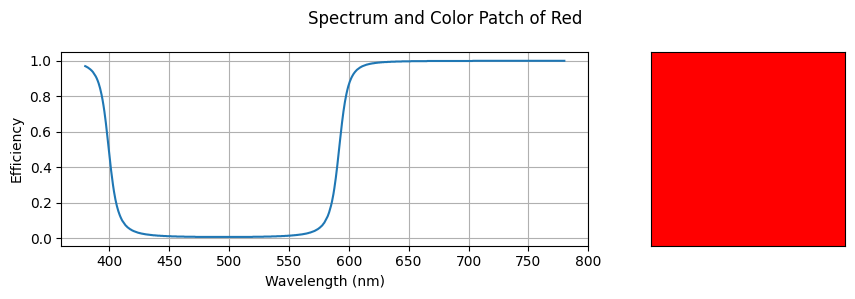

In [5]:
color = 'Red'
wavelengths = red[0, :]
spectrum = red[1, :]

print_visualize_spectrum_color(color, wavelengths, spectrum)

XYZ [0.35770768 0.7152834  0.11920309]
xyY [0.30004146 0.59997224 0.7152834 ]
Lab [ 0.87741066 -0.86168197  0.83187582]
sRGB [2.83182822e-03 1.00004069e+00 5.39103399e-05]


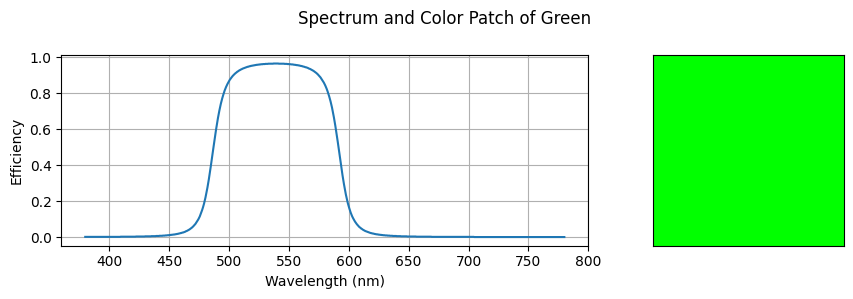

In [6]:
color = 'Green'
wavelengths = green[0, :]
spectrum = green[1, :]

print_visualize_spectrum_color(color, wavelengths, spectrum)

XYZ [0.18049038 0.07217972 0.95042747]
xyY [0.1500214  0.0599949  0.07217972]
Lab [ 0.32298063  0.79209142 -1.07866034]
sRGB [ 7.66648719e-04 -5.12677049e-04  9.99969442e-01]


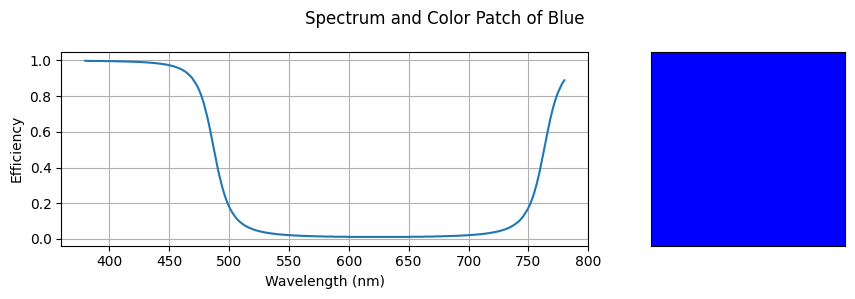

In [7]:
color = 'Blue'
wavelengths = blue[0, :]
spectrum = blue[1, :]

print_visualize_spectrum_color(color, wavelengths, spectrum)

XYZ [0.58582986 0.55619343 0.08748312]
xyY [0.47647564 0.45237131 0.55619343]
Lab [0.79396683 0.1431907  0.78175859]
sRGB [0.99992993 0.72157366 0.10994978]


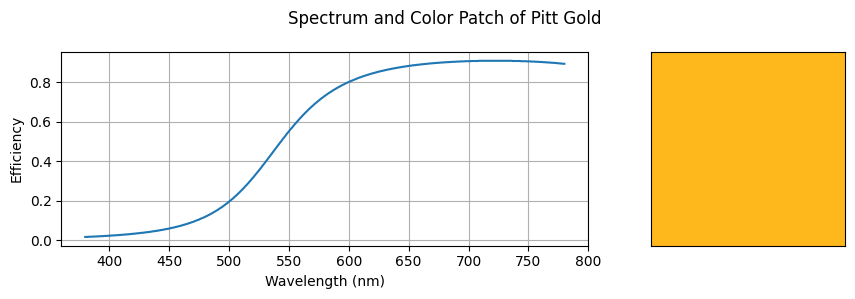

In [8]:
color = 'Pitt Gold'
wavelengths = pitt_gold[0, :]
spectrum = pitt_gold[1, :]

print_visualize_spectrum_color(color, wavelengths, spectrum)

XYZ [0.0662481  0.04690515 0.28578474]
xyY [0.16606115 0.11757503 0.04690515]
Lab [ 0.25834201  0.25448613 -0.55924642]
sRGB [0.00114641 0.20801422 0.58044362]


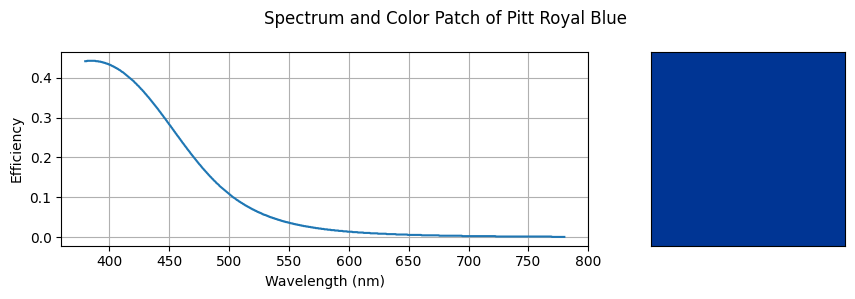

In [9]:
color = 'Pitt Royal Blue'
wavelengths = pitt_royal_blue[0, :]
spectrum = pitt_royal_blue[1, :]

print_visualize_spectrum_color(color, wavelengths, spectrum)